# SKILL VERTEX MACHINE LEARNING MAJOR PROJECT
# TITLE :- Walmart Store’s Sales Forecasting using Kaggle data set
### NAME :- YARRU LAKSHMI SAI KRISHNA
### EMAIL ID :- yarrulakshmisai111@gmail.com

# Loading data

### import all required packages like numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load all the datasets i.e
### 1. train
### 2. features
### 3. stores

# 1. train dataset

In [3]:
data=pd.read_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\train.csv",encoding="latin-1")

In [4]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

### check for any duplicated values

In [6]:
data.duplicated().value_counts()

False    421570
dtype: int64

### no duplicate values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


# 2. features dataset

In [8]:
features=pd.read_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\features.csv",encoding="latin-1")

In [9]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28-06-2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05-07-2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12-07-2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19-07-2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### we can see that there are so many null values in all Markdown columns and also CPI and Unemployment columns

### check for any duplicate values

In [12]:
features.duplicated().value_counts()

False    8190
dtype: int64

### no duplicate values

### fill all null values with corresponding mean values

In [13]:
features.fillna(value=features.mean(), inplace=True)

C:\Users\yarru\AppData\Local\Temp\ipykernel_18504\1544594304.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features.fillna(value=features.mean(), inplace=True)


In [14]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False
1,1,12-02-2010,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106000,True
2,1,19-02-2010,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106000,False
3,1,26-02-2010,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106000,False
4,1,05-03-2010,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28-06-2013,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,False
8186,45,05-07-2013,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,False
8187,45,12-07-2013,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,False
8188,45,19-07-2013,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,False


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### we can see that all null values are removed

### convert Date column to string for furthur calculations

In [16]:
data['Date'] = data['Date'].astype('str') 

# 3. stores dataset

In [17]:
stores=pd.read_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\stores.csv",encoding="latin-1")

In [18]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [19]:
stores.shape

(45, 3)

### check for any duplicate values

In [20]:
stores.duplicated().value_counts()

False    45
dtype: int64

### no duplicate values

In [21]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

# 4. Merge all datasets

### in order to apply a machine learning model
### we need to merge all three datasets

### first we merge train and stores datasets

In [22]:
df = data.merge(stores, how='left')


In [23]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


### no null values are present

In [25]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


### we can see that date format in features is different from that of train and stores datasets

### so change the format of Date column in features dataset
### otherwise we cannot combine this dataset to train dataset

In [26]:
features['Date']=features['Date'].astype(str).str[-4:]+"-"+features['Date'].astype(str).str[3:6]+features['Date'].astype(str).str[:2]

In [27]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


In [28]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

### merge features dataset to already merged train and stores dataset

In [29]:
df1 = df.merge(features, how='left')

### final dataset looks like

In [30]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.610000,20.640000,1.50000,1601.010000,3288.250000,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.740000,3384.176594,18.82000,2253.430000,2340.010000,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.280000,3384.176594,7.89000,599.320000,3990.540000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.020000,3384.176594,3.18000,437.730000,1537.490000,192.330854,8.667


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [32]:
df1.duplicated().value_counts()

False    421570
dtype: int64

# 5. Exploratory Data Analysis (EDA)
## a) Data Cleaning

### except Date, IsHoliday and Type columns all other columns are either int or float

### copy the dataset

In [33]:
train=df1.copy()

### convert Type column to integer by mapping

In [34]:
train['Type']=train['Type'].map({"A":0,"B":1,"C":2})

### convert IsHoliday column to integer by mapping

In [35]:
train['IsHoliday']=train['IsHoliday'].map({True:1,False:0})

In [36]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106


In [37]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
Type              int64
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

### Now except Date column everything is int or float

### extract year, month and week from Date column

In [38]:
train["year"]=train["Date"].astype(str).str[:4].astype('int64')

In [39]:
train["month"]=train["Date"].astype(str).str[5:7].astype('int64')

In [40]:
train['Date'] = pd.to_datetime(train['Date'],infer_datetime_format=True)

In [41]:

train['week'] = pd.DatetimeIndex(train['Date']).week
  
    

C:\Users\yarru\AppData\Local\Temp\ipykernel_18504\2603055671.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['week'] = pd.DatetimeIndex(train['Date']).week


In [42]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,2010,3,9


In [43]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
year                     int64
month                    int64
week                     int64
dtype: object

### remove Date column which is not necessary now

In [44]:
train=train.drop(labels="Date",axis=1)

In [45]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
0,1,1,24924.50,0,0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,2010,2,5
1,1,1,46039.49,1,0,151315,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,2010,2,6
2,1,1,41595.55,0,0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,2010,2,7
3,1,1,19403.54,0,0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,2010,2,8
4,1,1,21827.90,0,0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,2010,3,9


## b) Statistical analysis

### get some statistical info regarding all columns

In [46]:
train.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,0.589912,136727.915739,60.090059,3.361027,7108.878720,3371.101392,1655.818147,3321.824071,4310.656911,171.201947,7.960289,2010.968591,6.449510,25.826762
std,12.785297,30.492054,22711.183519,0.255750,0.666337,60980.583328,18.447931,0.458515,4957.982138,4867.542898,5489.657329,3560.601988,3581.733359,39.159276,1.863296,0.796876,3.243217,14.151887
min,1.000000,1.000000,-4988.940000,0.000000,0.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,0.000000,93638.000000,46.680000,2.933000,7032.371786,3384.176594,115.390000,3292.935886,4132.216422,132.022667,6.891000,2010.000000,4.000000,14.000000
50%,22.000000,37.000000,7612.030000,0.000000,0.000000,140167.000000,62.090000,3.452000,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,182.318780,7.866000,2011.000000,6.000000,26.000000
75%,33.000000,74.000000,20205.852500,0.000000,1.000000,202505.000000,74.280000,3.738000,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,212.416993,8.572000,2012.000000,9.000000,38.000000
max,45.000000,99.000000,693099.360000,1.000000,2.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000


### check correlation between all variables

In [47]:
train.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
Store,1.000000,0.024004,-0.085195,-0.000548,0.226410,-0.182881,-0.050097,0.065290,-0.071492,-0.017179,-0.017360,-0.006447,-0.015800,-0.211088,0.208552,0.002997,0.001011,0.001031
Dept,0.024004,1.000000,0.148032,0.000916,0.003708,-0.002966,0.004437,0.003572,-0.001359,0.000142,0.000913,0.002378,0.000395,-0.007477,0.007837,0.003738,0.000904,0.000882
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.182242,0.243828,-0.002312,-0.000120,0.052356,0.012994,0.035373,0.027356,0.055712,-0.020921,-0.025864,-0.010111,0.028409,0.027673
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.000798,0.000593,-0.155949,-0.078281,-0.021931,0.198192,0.262991,0.000007,-0.032199,-0.001944,0.010460,-0.056746,0.123376,0.128184
Type,0.226410,0.003708,-0.182242,-0.000798,1.000000,-0.811593,0.042981,0.029687,-0.153408,-0.029773,-0.020177,-0.052299,-0.155022,-0.065812,0.148720,0.004208,-0.000069,-0.000003
Size,-0.182881,-0.002966,0.243828,0.000593,-0.811593,1.000000,-0.058313,0.003361,0.206330,0.051437,0.025537,0.086367,0.182239,-0.003314,-0.068238,-0.004975,-0.001210,-0.001292
Temperature,-0.050097,0.004437,-0.002312,-0.155949,0.042981,-0.058313,1.000000,0.143859,-0.023452,-0.162464,-0.051196,-0.035113,-0.010817,0.182112,0.096730,0.065814,0.235983,0.236276
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.029687,0.003361,0.143859,1.000000,0.033128,-0.071678,-0.048856,-0.010492,-0.015979,-0.164210,-0.033853,0.779633,-0.040876,-0.031140
MarkDown1,-0.071492,-0.001359,0.052356,-0.021931,-0.153408,0.206330,-0.023452,0.033128,1.000000,0.022222,-0.107828,0.786658,0.161146,-0.032790,0.023242,0.055523,-0.111153,-0.124964
MarkDown2,-0.017179,0.000142,0.012994,0.198192,-0.029773,0.051437,-0.162464,-0.071678,0.022222,1.000000,-0.048317,-0.006708,-0.007515,-0.020997,0.010714,-0.058012,-0.002784,-0.000382


**statistical observations**
1. Store, Dept, IsHoliday, Type, year, month, week all are categorical
2. remaining columns are continuous i.e integer or float
3. month and week are highly correlated i.e 0.995999 so any one of them can be removed later
4. fuel price and temperature have very less impact on weekly sales

# 6. DATA VISUALIZATION

## a) Univariate analysis

## histograms for discrete variables

(array([48789., 38735., 50596., 39067., 39632., 50161., 36866., 42663.,
        34463., 40598.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

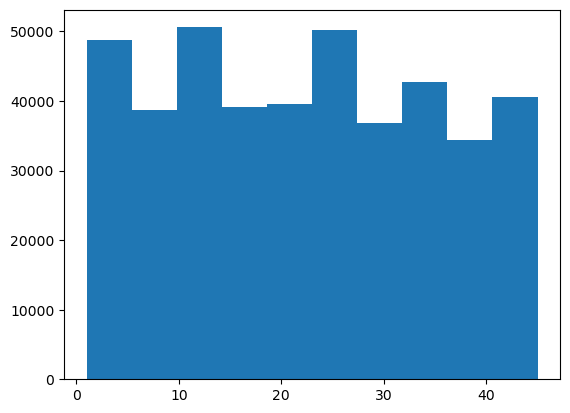

In [48]:
plt.hist(train.Store)

(array([63732., 53740., 57593., 48794., 32518., 35955., 12350., 24605.,
        37115., 55168.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

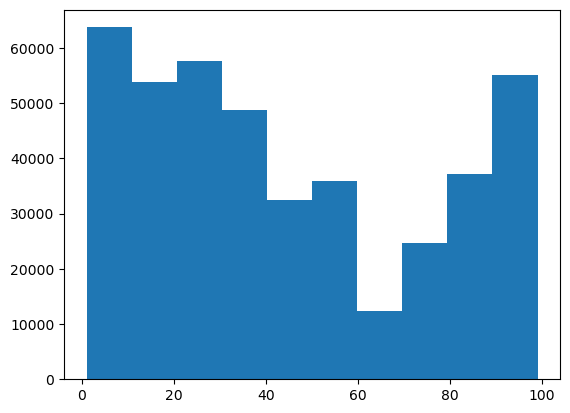

In [49]:
plt.hist(train.Dept)

<AxesSubplot:>

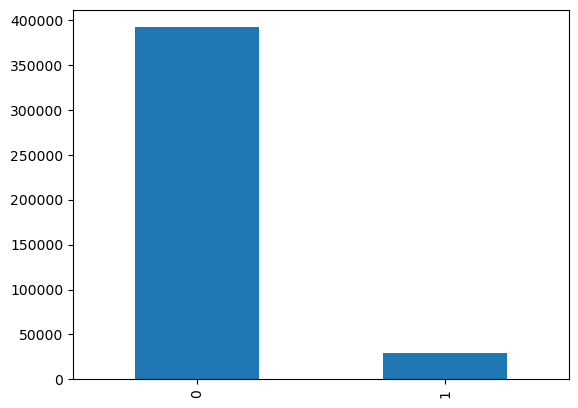

In [50]:
train.IsHoliday.value_counts().sort_index().plot.bar()

<AxesSubplot:>

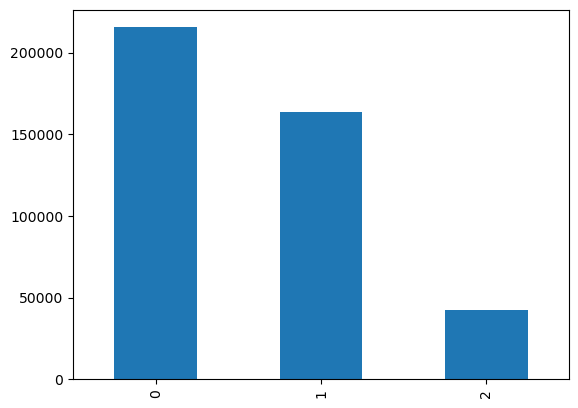

In [51]:
train.Type.value_counts().sort_index().plot.bar()

(array([ 73341.,  19205.,      0.,  28847.,  78022.,  19386.,  50234.,
             0.,  30006., 122529.]),
 array([ 34875. ,  53349.7,  71824.4,  90299.1, 108773.8, 127248.5,
        145723.2, 164197.9, 182672.6, 201147.3, 219622. ]),
 <BarContainer object of 10 artists>)

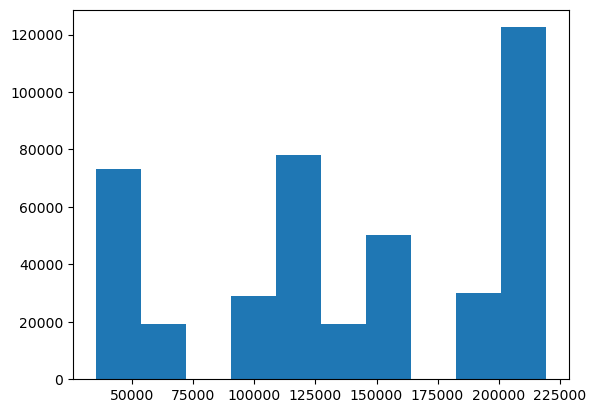

In [52]:
plt.hist(train.Size)

<AxesSubplot:>

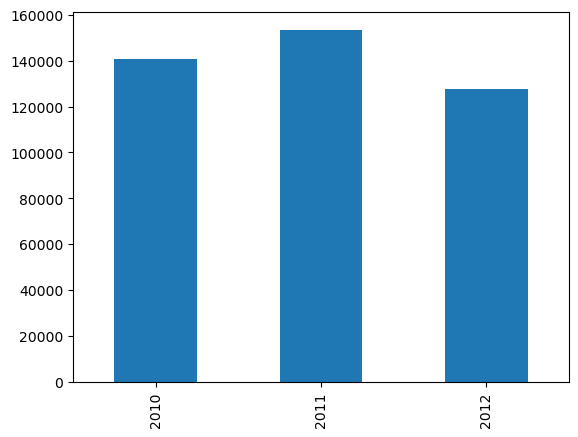

In [53]:
train.year.value_counts().sort_index().plot.bar()

<AxesSubplot:>

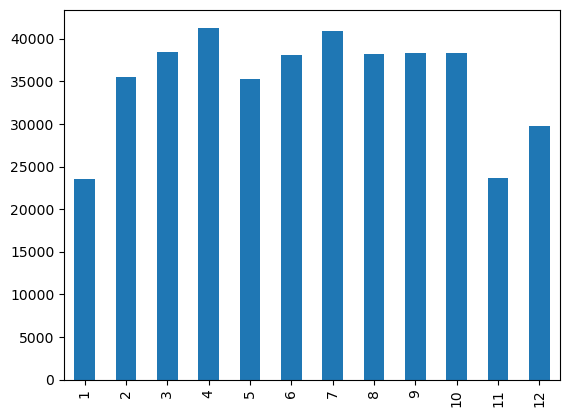

In [54]:
train.month.value_counts().sort_index().plot.bar()

<AxesSubplot:>

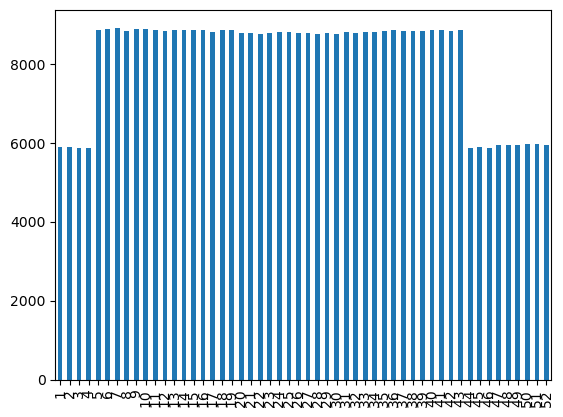

In [55]:
train.week.value_counts().sort_index().plot.bar()

## Boxplots for continuous variables

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

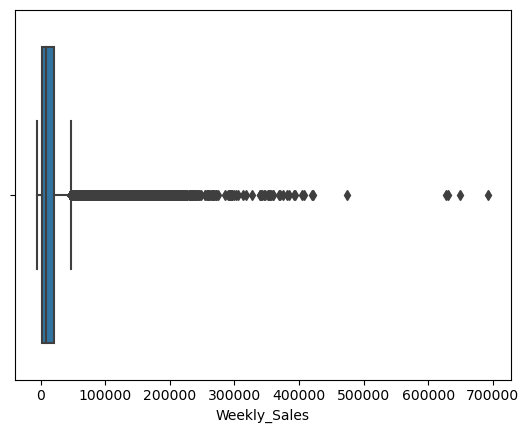

In [56]:
sns.boxplot(train['Weekly_Sales'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

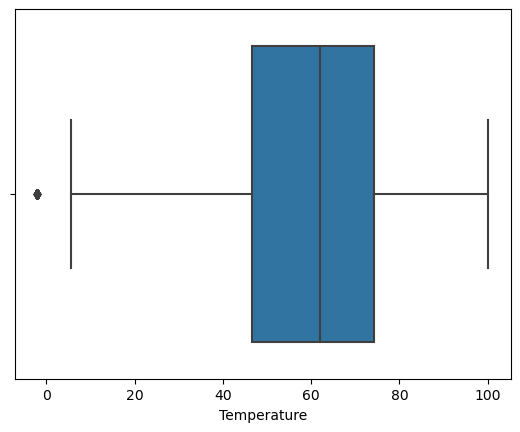

In [57]:
sns.boxplot(train['Temperature'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

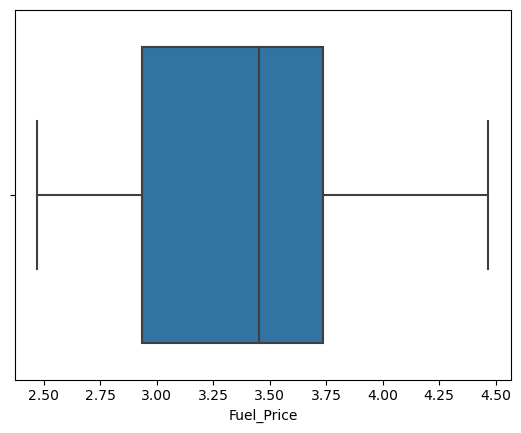

In [58]:
sns.boxplot(train['Fuel_Price'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarkDown1'>

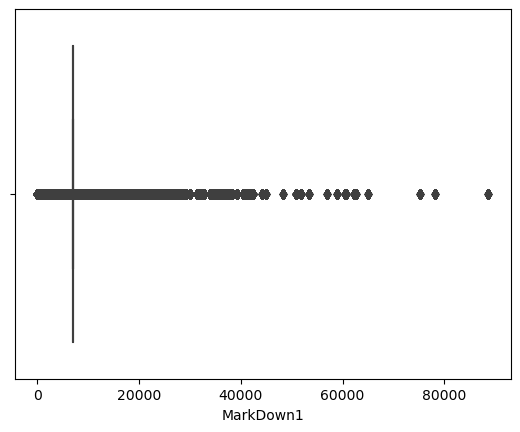

In [59]:
sns.boxplot(train['MarkDown1'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarkDown2'>

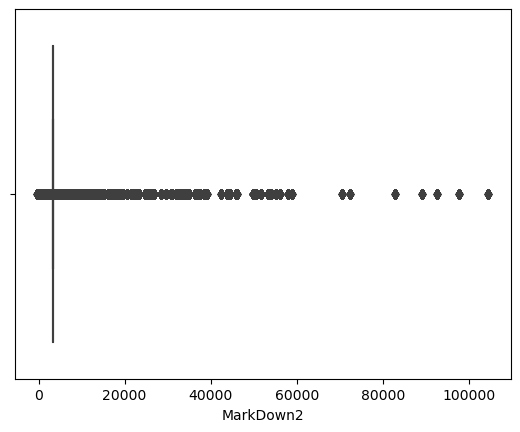

In [60]:
sns.boxplot(train['MarkDown2'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarkDown3'>

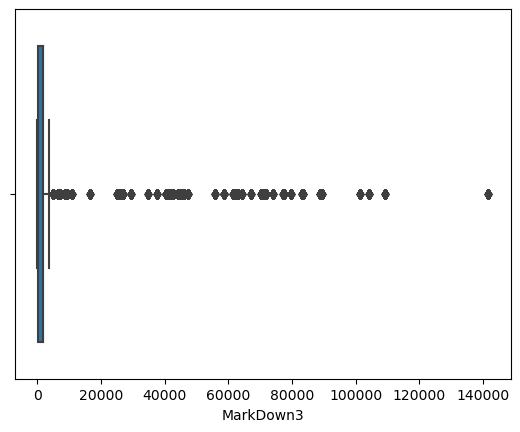

In [61]:
sns.boxplot(train['MarkDown3'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarkDown4'>

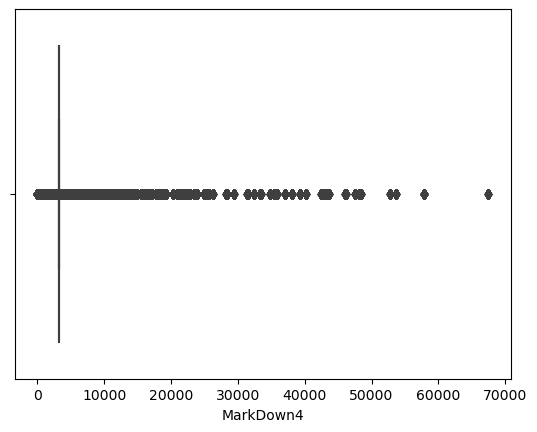

In [62]:
sns.boxplot(train['MarkDown4'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MarkDown5'>

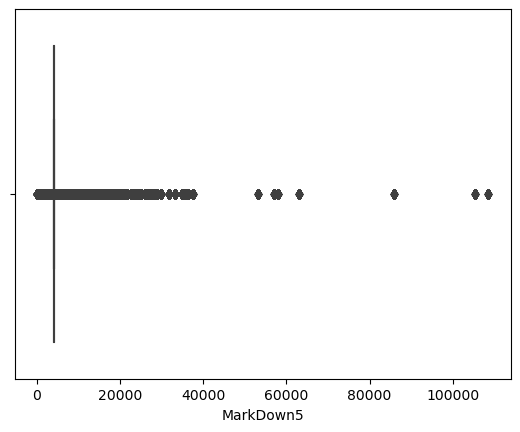

In [63]:
sns.boxplot(train['MarkDown5'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

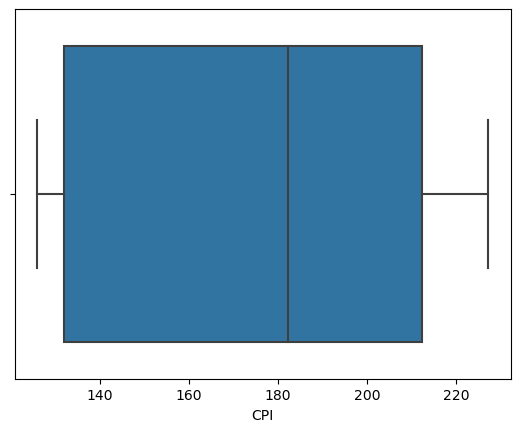

In [64]:
sns.boxplot(train['CPI'])

C:\Users\yarru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

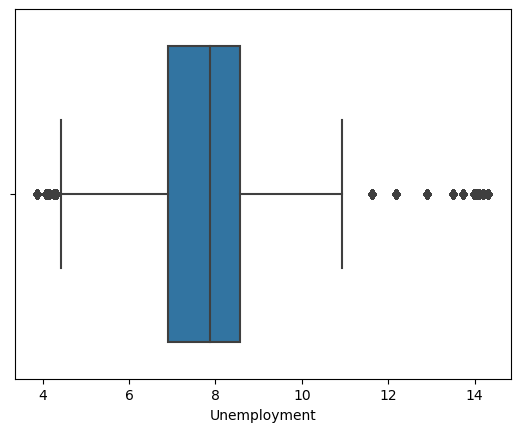

In [65]:
sns.boxplot(train['Unemployment'])

## b) Multivariate analysis

### use box plots for discrete vs continuous

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

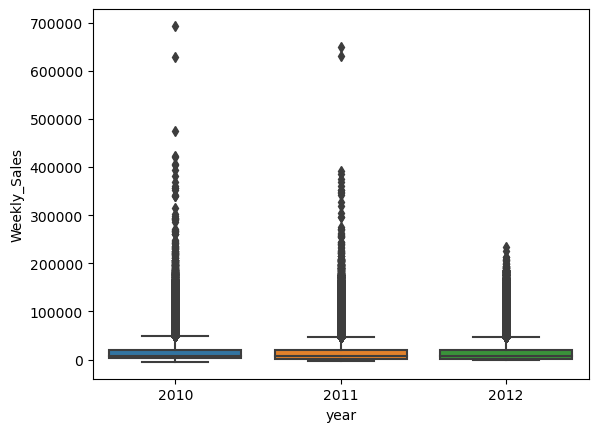

In [66]:
sns.boxplot(x='year',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

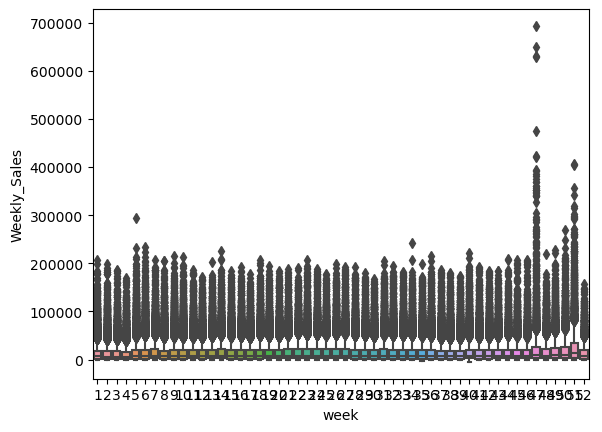

In [67]:
sns.boxplot(x='week',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

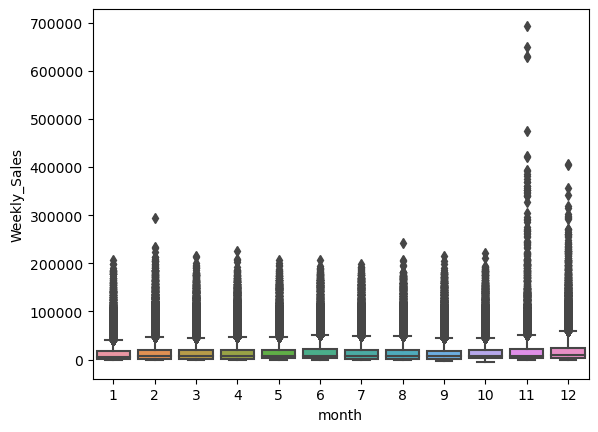

In [68]:
sns.boxplot(x='month',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

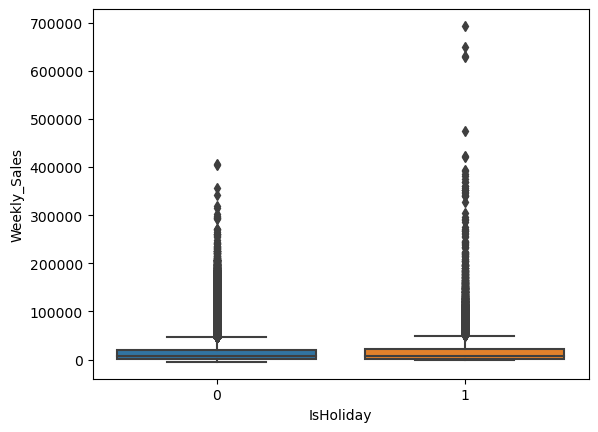

In [69]:
sns.boxplot(x='IsHoliday',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

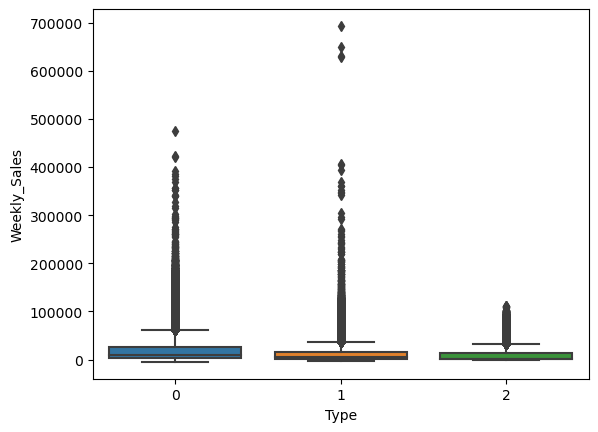

In [70]:
sns.boxplot(x='Type',y='Weekly_Sales',data=train)

### use scatterplots for continuous vs continuous

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

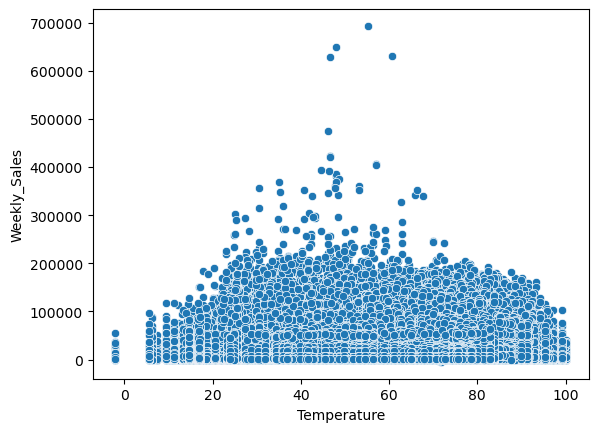

In [71]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

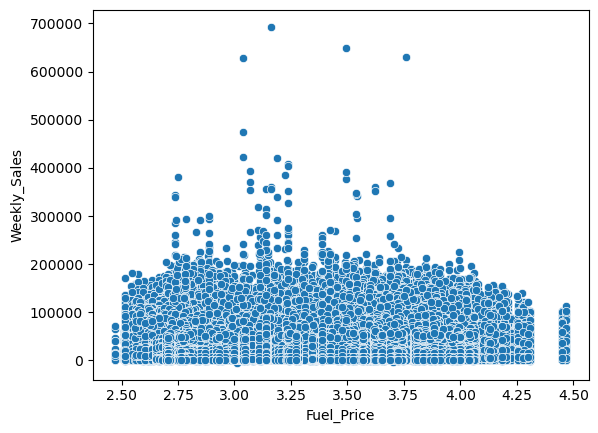

In [72]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

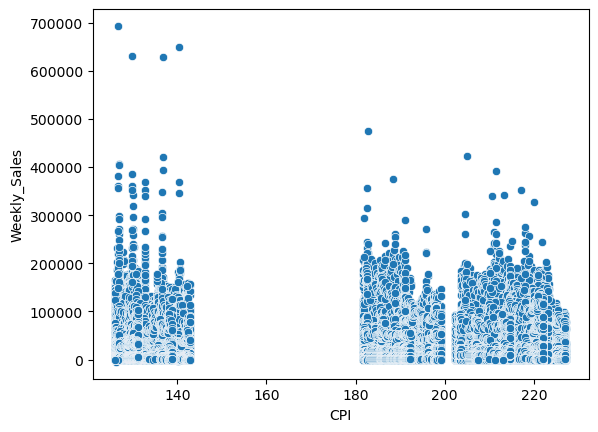

In [73]:
sns.scatterplot(x='CPI',y='Weekly_Sales',data=train)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

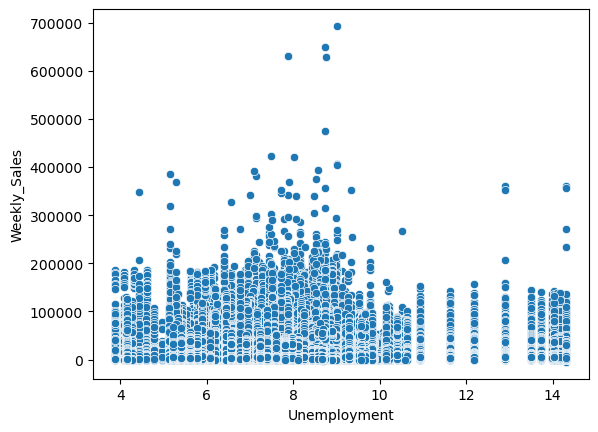

In [74]:
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=train)

## remove month column

In [75]:
train=train.drop(labels="month",axis=1)

In [76]:
train.shape

(421570, 17)

### copy dataset

In [77]:
data1=train.copy()

In [78]:
data1.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,week
0,1,1,24924.50,0,0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,2010,5
1,1,1,46039.49,1,0,151315,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,2010,6
2,1,1,41595.55,0,0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,2010,7
3,1,1,19403.54,0,0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,2010,8
4,1,1,21827.90,0,0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,2010,9


# 7. remove outliers

In [79]:
q1= data1.quantile(0.15)
q3= data1.quantile(0.85)
iqr=q3-q1
iqr

Store               31.000000
Dept                75.000000
Weekly_Sales     31753.762000
IsHoliday            0.000000
Type                 1.000000
Size            162757.000000
Temperature         41.390000
Fuel_Price           1.070000
MarkDown1         2687.361786
MarkDown2         3089.706594
MarkDown3         1740.540180
MarkDown4         1970.965886
MarkDown5         1339.516422
CPI                 86.223042
Unemployment         2.753000
year                 2.000000
week                33.000000
dtype: float64

In [80]:
data2=data1[~((data1<(q1-1.5*iqr))|(data1>(q3+1.5*iqr)))]

In [81]:
data2.isna().sum()

Store               0
Dept                0
Weekly_Sales    10332
IsHoliday       29661
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1       40003
MarkDown2       11594
MarkDown3        3269
MarkDown4       16791
MarkDown5       40853
CPI                 0
Unemployment    16417
year                0
week                0
dtype: int64

In [82]:
data2=data2.dropna()

In [83]:
data2.shape

(301896, 17)

In [84]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301896 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         301896 non-null  int64  
 1   Dept          301896 non-null  int64  
 2   Weekly_Sales  301896 non-null  float64
 3   IsHoliday     301896 non-null  float64
 4   Type          301896 non-null  int64  
 5   Size          301896 non-null  int64  
 6   Temperature   301896 non-null  float64
 7   Fuel_Price    301896 non-null  float64
 8   MarkDown1     301896 non-null  float64
 9   MarkDown2     301896 non-null  float64
 10  MarkDown3     301896 non-null  float64
 11  MarkDown4     301896 non-null  float64
 12  MarkDown5     301896 non-null  float64
 13  CPI           301896 non-null  float64
 14  Unemployment  301896 non-null  float64
 15  year          301896 non-null  int64  
 16  week          301896 non-null  int64  
dtypes: float64(11), int64(6)
memory usage: 41.5 MB


# 8. add missing week columns

## some week numbers may be missing which may be present in test dataset

## add those columns with all values initialized to zero

In [85]:
l=data2['week'].unique().tolist()

In [86]:
l.sort()

In [87]:
w=list(range(1,54))

In [88]:
s = set(l)
temp3 = [x for x in w if x not in s]
print(temp3)

[6, 36, 47, 52, 53]


In [89]:
f=[]
for i in range(len(temp3)):
    f.append('week_'+str(temp3[i]))

In [90]:
f

['week_6', 'week_36', 'week_47', 'week_52', 'week_53']

### copy dataset

In [91]:
train1=data2.copy()

In [92]:
train1

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,week
0,1,1,24924.50,0.0,0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,2010,5
2,1,1,41595.55,0.0,0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,2010,7
3,1,1,19403.54,0.0,0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,2010,8
4,1,1,21827.90,0.0,0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,2010,9
5,1,1,21043.39,0.0,0,151315,57.79,2.667,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.380643,8.106,2010,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0.0,1,118221,64.88,3.997,4556.610000,20.640000,1.50000,1601.010000,3288.250000,192.013558,8.684,2012,39
421566,45,98,628.10,0.0,1,118221,64.89,3.985,5046.740000,3384.176594,18.82000,2253.430000,2340.010000,192.170412,8.667,2012,40
421567,45,98,1061.02,0.0,1,118221,54.47,4.000,1956.280000,3384.176594,7.89000,599.320000,3990.540000,192.327265,8.667,2012,41
421568,45,98,760.01,0.0,1,118221,56.47,3.969,2004.020000,3384.176594,3.18000,437.730000,1537.490000,192.330854,8.667,2012,42


# 9. One Hot encoding

## All categorical columns are one hot encoded

In [93]:
train1['Type']=train1['Type'].astype('category')

In [94]:
train1=pd.get_dummies(train1)

In [95]:
train1['week']=train1['week'].astype('category')

In [96]:
train1=pd.get_dummies(train1)

In [97]:
train1['Store']=train1['Store'].astype('category')

In [98]:
train1=pd.get_dummies(train1)

In [99]:
train1['Dept']=train1['Dept'].astype('category')

In [100]:
train1=pd.get_dummies(train1)

In [101]:
train1.head()

,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,24924.50,0.0,151315,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,...,0,0,0,0,0,0,0,0,0,0
2,41595.55,0.0,151315,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,...,0,0,0,0,0,0,0,0,0,0
3,19403.54,0.0,151315,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,...,0,0,0,0,0,0,0,0,0,0
4,21827.90,0.0,151315,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,...,0,0,0,0,0,0,0,0,0,0
5,21043.39,0.0,151315,57.79,2.667,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,...,0,0,0,0,0,0,0,0,0,0


### add missing week number columns

In [102]:
for i in range(len(f)):
    train1[f[i]]=0

### copy dataset

In [103]:
data2=train1.copy()

### drop fuel price column

In [104]:
data2=data2.drop(labels="Fuel_Price",axis=1)

In [105]:
data2.shape

(301896, 194)

# 10. Model fitting

## a) Linear regression

In [106]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [107]:
x=data2.drop(labels='Weekly_Sales',axis=1)

In [108]:
y=data2['Weekly_Sales']

### spltting data into train set and test set

In [109]:
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.3,random_state=10)

In [110]:
xtr.shape

(211327, 193)

In [111]:
xts.shape

(90569, 193)

### fitting model

In [112]:
reg = LinearRegression().fit(xtr,ytr)

In [113]:
ytrp=pd.DataFrame(reg.predict(xtr),columns=['Weekly_Sales'])

In [114]:
ytsp=pd.DataFrame(reg.predict(xts),columns=['Weekly_Sales'])

### evaluation of model using metrics

In [115]:
from sklearn import metrics

In [116]:
metrics.r2_score(ytr,ytrp)

0.683465296268998

In [117]:
metrics.r2_score(yts,ytsp)

0.683552311140271

### r2 score is equivalent to accuracy or score of model
### considering we are using linear regression with very less correlated features, this score is good enough
### we shall check other metrics like maximum and minimum error, mean squared error, mean absolute error, variance, poisson deviance etc

In [118]:
metrics.max_error(ytr,ytrp)

65365.55693586804

In [119]:
metrics.max_error(yts,ytsp)

64329.12574224261

In [120]:
metrics.mean_squared_error(ytr,ytrp)

83543348.47962295

In [121]:
metrics.mean_squared_error(yts,ytsp)

83920556.6359883

In [122]:
metrics.mean_absolute_error(ytr,ytrp)

6351.15344202514

In [123]:
metrics.mean_absolute_error(yts,ytsp)

6363.8136565487275

In [124]:
metrics.explained_variance_score(ytr,ytrp)

0.683465296268998

In [125]:
metrics.explained_variance_score(yts,ytsp)

0.6835526685555658

## b) polynomial regression

In [128]:
a=x
b=y

In [129]:
a.shape

(301896, 193)

In [130]:
b.shape

(301896,)

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
poly=PolynomialFeatures(degree=2)

In [133]:
a.columns

Index(['IsHoliday', 'Size', 'Temperature', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       ...
       'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99', 'week_6',
       'week_36', 'week_47', 'week_52', 'week_53'],
      dtype='object', length=193)

In [134]:
poly.fit_transform(a[['Size', 'Temperature', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])

array([[1.00000000e+00, 1.51315000e+05, 4.23100000e+01, ...,
        4.45616724e+04, 1.71114708e+03, 6.57072360e+01],
       [1.00000000e+00, 1.51315000e+05, 3.99300000e+01, ...,
        4.46431019e+04, 1.71270979e+03, 6.57072360e+01],
       [1.00000000e+00, 1.51315000e+05, 4.66300000e+01, ...,
        4.46559915e+04, 1.71295703e+03, 6.57072360e+01],
       ...,
       [1.00000000e+00, 1.18221000e+05, 5.44700000e+01, ...,
        3.69897770e+04, 1.66690041e+03, 7.51168890e+01],
       [1.00000000e+00, 1.18221000e+05, 5.64700000e+01, ...,
        3.69911575e+04, 1.66693151e+03, 7.51168890e+01],
       [1.00000000e+00, 1.18221000e+05, 5.88500000e+01, ...,
        3.69827126e+04, 1.66674123e+03, 7.51168890e+01]])

In [135]:
a.columns

Index(['IsHoliday', 'Size', 'Temperature', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       ...
       'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99', 'week_6',
       'week_36', 'week_47', 'week_52', 'week_53'],
      dtype='object', length=193)

In [136]:
c=poly.fit_transform(a[['Size', 'Temperature', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])

In [137]:
c=pd.DataFrame(c)

In [138]:
c=c.drop(labels=0,axis=1)

In [139]:
c.head()

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,151315.0,42.31,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,2.289623e+10,...,1.084343e+07,1.360712e+07,695126.773375,26692.538294,1.707521e+07,872295.838025,33495.746319,44561.672445,1711.147080,65.707236
1,151315.0,39.93,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,2.289623e+10,...,1.084343e+07,1.360712e+07,695761.601032,26692.538294,1.707521e+07,873092.466129,33495.746319,44643.101907,1712.709792,65.707236
2,151315.0,46.63,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,2.289623e+10,...,1.084343e+07,1.360712e+07,695862.035577,26692.538294,1.707521e+07,873218.498730,33495.746319,44655.991475,1712.957025,65.707236
3,151315.0,46.50,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,2.289623e+10,...,1.084343e+07,1.360712e+07,695962.470121,26692.538294,1.707521e+07,873344.531330,33495.746319,44668.882904,1713.204258,65.707236
4,151315.0,57.79,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.380643,8.106,2.289623e+10,...,1.084343e+07,1.360712e+07,696062.904666,26692.538294,1.707521e+07,873470.563931,33495.746319,44681.776193,1713.451491,65.707236


In [140]:
d=a.drop(labels=['Size', 'CPI', 'Unemployment'],axis=1)

In [141]:
d.head()

,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,Type_0,Type_1,...,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,week_6,week_36,week_47,week_52,week_53
0,0.0,42.31,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,39.93,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,46.63,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,46.50,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,57.79,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
d=d.reset_index().drop(labels='index',axis=1)

In [143]:
e=pd.concat([d,c],axis=1)

In [144]:
e.head()

,IsHoliday,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,Type_0,Type_1,...,45,46,47,48,49,50,51,52,53,54
0,0.0,42.31,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,1.084343e+07,1.360712e+07,695126.773375,26692.538294,1.707521e+07,872295.838025,33495.746319,44561.672445,1711.147080,65.707236
1,0.0,39.93,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,1.084343e+07,1.360712e+07,695761.601032,26692.538294,1.707521e+07,873092.466129,33495.746319,44643.101907,1712.709792,65.707236
2,0.0,46.63,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,1.084343e+07,1.360712e+07,695862.035577,26692.538294,1.707521e+07,873218.498730,33495.746319,44655.991475,1712.957025,65.707236
3,0.0,46.50,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,1.084343e+07,1.360712e+07,695962.470121,26692.538294,1.707521e+07,873344.531330,33495.746319,44668.882904,1713.204258,65.707236
4,0.0,57.79,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,2010,1,0,...,1.084343e+07,1.360712e+07,696062.904666,26692.538294,1.707521e+07,873470.563931,33495.746319,44681.776193,1713.451491,65.707236


In [145]:
b=b.reset_index()

In [146]:
b=b.drop(labels=['index'],axis=1)

In [147]:
e.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('uint8')], dtype=object)

In [148]:
b.dtypes.unique()

array([dtype('float64')], dtype=object)

In [149]:
e.columns=e.columns.astype(str)

In [150]:
xtr,xts,ytr,yts= train_test_split(e,b,test_size=0.3,random_state=0)

In [151]:
xtr.shape

(211327, 244)

In [152]:
ytr.shape

(211327, 1)

In [153]:
xts.shape

(90569, 244)

In [154]:
yts.shape

(90569, 1)

In [155]:
x.dtypes

IsHoliday      float64
Size             int64
Temperature    float64
MarkDown1      float64
MarkDown2      float64
                ...   
week_6           int64
week_36          int64
week_47          int64
week_52          int64
week_53          int64
Length: 193, dtype: object

## model fitting

In [156]:
reg = LinearRegression().fit(xtr, ytr)

In [157]:
ytrp=pd.DataFrame(reg.predict(xtr),columns=['price'])

In [158]:
ytsp=pd.DataFrame(reg.predict(xts),columns=['price'])

In [159]:
metrics.r2_score(ytr,ytrp)

0.6833128928634158

In [160]:
metrics.r2_score(yts,ytsp)

0.6844164541340586

## we can see that no much difference in R2 score compared to linear regression

## c) Decesion Tree regression

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
data3=train1.copy()

In [173]:
x=data3.drop(labels='Weekly_Sales',axis=1)
y=data3['Weekly_Sales']
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.3,random_state=0)

## model fitting

In [174]:
model = DecisionTreeRegressor(random_state=44)

In [175]:
model.fit(xtr,ytr)

DecisionTreeRegressor(random_state=44)

In [176]:
ytrp=model.predict(xtr)

In [177]:
metrics.r2_score(ytr,ytrp)

1.0

### very high accuracy score of 100 percent is acchieved using decesion tree

In [178]:
ytsp=model.predict(xts)

In [179]:
metrics.r2_score(yts,ytsp)

0.9550825026742735

### 95.5 accuracy is achieved on test set

## c) Randomm Forest Regression

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
rfr = RandomForestRegressor()

In [182]:
rfr.fit(xtr,ytr)

RandomForestRegressor()

In [183]:
ytrp=rfr.predict(xtr)

In [184]:
ytsp=rfr.predict(xts)

In [185]:
metrics.r2_score(ytr,ytrp)

0.9961518563002475

In [186]:
metrics.r2_score(yts,ytsp)

0.9729418378669485

### Accuracy for test dataset is very high but takes very long time than decesion tree

# 11. Model implementation on test dataset for submission

### load test dataset

In [187]:
test=pd.read_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\test.csv",encoding="latin-1")

In [188]:
test.shape

(115064, 4)

In [189]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [190]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [191]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

## merge features and stores dataset to test dataset

In [192]:
test1=test.merge(stores, how='left')

In [193]:
test1.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [194]:
test2=test1.merge(features, how='left')

In [195]:
test2.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,3384.176594,3838.35,150.57,6966.34,223.610984,6.573


In [196]:
test2.shape

(115064, 15)

In [197]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Type          115064 non-null  object 
 5   Size          115064 non-null  int64  
 6   Temperature   115064 non-null  float64
 7   Fuel_Price    115064 non-null  float64
 8   MarkDown1     115064 non-null  float64
 9   MarkDown2     115064 non-null  float64
 10  MarkDown3     115064 non-null  float64
 11  MarkDown4     115064 non-null  float64
 12  MarkDown5     115064 non-null  float64
 13  CPI           115064 non-null  float64
 14  Unemployment  115064 non-null  float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


### no null values present in test dataset

## extract year, month and week columns

In [198]:
test2["year"]=test2["Date"].astype(str).str[:4].astype('int64')

In [199]:
test2["month"]=test2["Date"].astype(str).str[5:7].astype('int64')

In [200]:
test2['Date'] = pd.to_datetime(test2['Date'],infer_datetime_format=True)
test2['week'] = pd.DatetimeIndex(test2['Date']).week

C:\Users\yarru\AppData\Local\Temp\ipykernel_18504\274085038.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test2['week'] = pd.DatetimeIndex(test2['Date']).week


In [201]:
test2.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,2012,11,44
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,2012,11,45
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,2012,11,46
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,2012,11,47
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,3384.176594,3838.35,150.57,6966.34,223.610984,6.573,2012,11,48


### drop Date column

In [202]:
test2=test2.drop(labels="Date",axis=1)

In [203]:
test2.shape

(115064, 17)

### convert categorical columns into int

In [204]:
test2['Type']=test2['Type'].map({"A":0,"B":1,"C":2})

In [205]:
test2['IsHoliday']=test2['IsHoliday'].map({True:1,False:0})

In [206]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   IsHoliday     115064 non-null  int64  
 3   Type          115064 non-null  int64  
 4   Size          115064 non-null  int64  
 5   Temperature   115064 non-null  float64
 6   Fuel_Price    115064 non-null  float64
 7   MarkDown1     115064 non-null  float64
 8   MarkDown2     115064 non-null  float64
 9   MarkDown3     115064 non-null  float64
 10  MarkDown4     115064 non-null  float64
 11  MarkDown5     115064 non-null  float64
 12  CPI           115064 non-null  float64
 13  Unemployment  115064 non-null  float64
 14  year          115064 non-null  int64  
 15  month         115064 non-null  int64  
 16  week          115064 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 15.8 MB


### drop month column

In [207]:
test2=test2.drop(labels="month",axis=1)

In [208]:
test2.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,week
0,1,1,0,0,151315,55.32,3.386,6766.44,5147.700000,50.82,3639.90,2737.42,223.462779,6.573,2012,44
1,1,1,0,0,151315,61.24,3.314,11421.32,3370.890000,40.28,4646.79,6154.16,223.481307,6.573,2012,45
2,1,1,0,0,151315,52.92,3.252,9696.28,292.100000,103.78,1133.15,6612.69,223.512911,6.573,2012,46
3,1,1,1,0,151315,56.23,3.211,883.59,4.170000,74910.32,209.91,303.32,223.561947,6.573,2012,47
4,1,1,0,0,151315,52.34,3.207,2460.03,3384.176594,3838.35,150.57,6966.34,223.610984,6.573,2012,48


In [209]:
test2.describe()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,week
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,0.077592,0.592731,136497.688921,53.941804,3.581546,7688.365870,3647.005603,2348.163287,3349.130897,3922.681189,175.468703,7.186492,2012.767182,23.050963
std,12.809930,30.656410,0.267529,0.668876,61106.926438,18.724153,0.239442,10691.857424,7215.736146,13167.993068,7133.962607,19445.150745,33.780998,1.370824,0.422629,15.750407
min,1.000000,1.000000,0.000000,0.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,2012.000000,1.000000
25%,11.000000,18.000000,0.000000,0.000000,93638.000000,39.820000,3.431000,1974.680000,306.120000,18.000000,200.480000,1309.300000,138.900429,6.228000,2013.000000,10.000000
50%,22.000000,37.000000,0.000000,0.000000,140167.000000,54.470000,3.606000,4842.660000,1568.710000,94.925000,1239.780000,2390.430000,172.460809,7.826821,2013.000000,20.000000
75%,33.000000,74.000000,0.000000,1.000000,202505.000000,67.350000,3.766000,9427.410000,3384.176594,418.520000,3292.935886,4227.270000,201.212230,7.826821,2013.000000,30.000000
max,45.000000,99.000000,1.000000,2.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,2013.000000,52.000000


### copy dataset

In [210]:
test3=test2.copy()

### one hot encoding

In [211]:
test3['Type']=test3['Type'].astype('category')
test3=pd.get_dummies(test3)

In [212]:
test3['week']=test3['week'].astype('category')
test3=pd.get_dummies(test3)

In [213]:
test3['Store']=test3['Store'].astype('category')
test3=pd.get_dummies(test3)

In [214]:
test3['Dept']=test3['Dept'].astype('category')
test3=pd.get_dummies(test3)

## add any missing week number columns

In [215]:
l=test2['week'].unique().tolist()

In [216]:
l.sort()

In [217]:
w=list(range(1,54))

In [218]:
s = set(l)
temp3 = [x for x in w if x not in s]
print(temp3)

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 53]


In [219]:
f=[]
for i in range(len(temp3)):
    f.append('week_'+str(temp3[i]))

In [220]:
for i in range(len(f)):
    test3[f[i]]=0

In [221]:
test3.shape

(115064, 194)

## use the decesion tree model to predict sales of test data

In [222]:
ytsf=model.predict(test3)

C:\Users\yarru\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [223]:
ytsf

array([ 826.78,  826.78,  826.78, ..., 6629.09, 6629.09, 6377.15])

## load sample submission csv file

In [224]:
sub=pd.read_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\sampleSubmission.csv",encoding="latin-1")

In [225]:
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


## update weekly sales column with predicted values

In [226]:
sub['Weekly_Sales']=ytsf

In [227]:
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,826.78
1,1_1_2012-11-09,826.78
2,1_1_2012-11-16,826.78
3,1_1_2012-11-23,1754.82
4,1_1_2012-11-30,826.78
...,...,...
115059,45_98_2013-06-28,8289.04
115060,45_98_2013-07-05,5228.00
115061,45_98_2013-07-12,6629.09
115062,45_98_2013-07-19,6629.09


## convert this into csv file and submit in kaggle to check score

In [228]:
sub.to_csv(r"C:\Users\yarru\OneDrive\Desktop\skill vertex\major project\sampleSubmission.csv\Submission.csv",index=False)

# After submission in kaggle the results are
# metric use dfor evaluation: weighted mean absolute error (WMAE)
# public score: 22072.27853
# Private score: 22477.82223

# THANK YOU

### NAME :- YARRU LAKSHMI SAI KRISHNA
### EMAIL ID :- yarrulakshmisai111@gmail.com